# Removing Features

In [88]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [89]:
# Drop the EIN AND NAME columns 
application_df= application_df.drop(columns=["EIN","NAME"])
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [90]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [91]:
# Look at APPLICATION_TYPE value counts for binning
app_col=application_df["APPLICATION_TYPE"].value_counts()
app_col

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

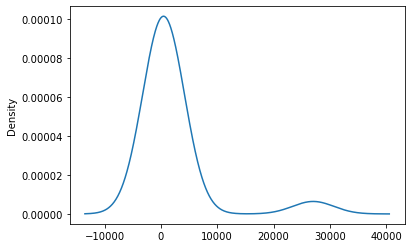

In [92]:
# Visualize the value counts of APPLICATION_TYPE
application_df["APPLICATION_TYPE"].value_counts().plot.density()

In [93]:
# Replace Bins into dataframe- APPLICATION
replace_app= app_col[app_col < 800].index.tolist()

for app in replace_app:
    application_df.APPLICATION_TYPE= application_df.APPLICATION_TYPE.replace(app,"Other")
    
application_df.APPLICATION_TYPE.value_counts()

T3       27037
Other     2266
T4        1542
T6        1216
T5        1173
T19       1065
Name: APPLICATION_TYPE, dtype: int64

In [95]:
# Check CLASSIFICATION Column
classification_col= application_df["CLASSIFICATION"].value_counts()
classification_col.head()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [96]:
# Replace Bins into dataframe- CLASSIFICATION
replace_class= classification_col[classification_col<800].index.tolist()

for clase in replace_class:
    application_df.CLASSIFICATION=application_df.CLASSIFICATION.replace(clase, "Other")
    
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [97]:
# Generate our categorical variable lists 
application_cgl=application_df.dtypes[application_df.dtypes=="object"].index.tolist()
application_df[application_cgl].nunique()

APPLICATION_TYPE          6
AFFILIATION               6
CLASSIFICATION            6
USE_CASE                  5
ORGANIZATION              4
INCOME_AMT                9
SPECIAL_CONSIDERATIONS    2
dtype: int64

In [98]:
# Create a OneHotEncoder instance 
enc= OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder unsing categorical list 
encode_df= pd.DataFrame(enc.fit_transform(application_df[application_cgl]))

# Add the encoded variable names to the dataframe 
encode_df.columns= enc.get_feature_names(application_cgl)
encode_df.head()

C:\Users\jmoussavou\Anaconda3\envs\mlenv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,APPLICATION_TYPE_Other,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,AFFILIATION_Independent,AFFILIATION_National,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [99]:
# Merge One-Hot encoded features and drop the originals
prep_application_df= application_df.merge(encode_df,left_index=True, right_index=True).drop(columns= application_cgl)
prep_application_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,AFFILIATION_CompanySponsored,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


# Attempt #2
## Drop Noisy Features, 2 Hidden Layers(80, 30 neurons)

In [100]:
# Going to delete columns that are unnecessary and run NN
print(len(prep_application_df.columns))

41


In [101]:
prep_application_df.columns

Index(['STATUS', 'ASK_AMT', 'IS_SUCCESSFUL', 'APPLICATION_TYPE_Other',
       'APPLICATION_TYPE_T19', 'APPLICATION_TYPE_T3', 'APPLICATION_TYPE_T4',
       'APPLICATION_TYPE_T5', 'APPLICATION_TYPE_T6',
       'AFFILIATION_CompanySponsored', 'AFFILIATION_Family/Parent',
       'AFFILIATION_Independent', 'AFFILIATION_National', 'AFFILIATION_Other',
       'AFFILIATION_Regional', 'CLASSIFICATION_C1000', 'CLASSIFICATION_C1200',
       'CLASSIFICATION_C2000', 'CLASSIFICATION_C2100', 'CLASSIFICATION_C3000',
       'CLASSIFICATION_Other', 'USE_CASE_CommunityServ', 'USE_CASE_Heathcare',
       'USE_CASE_Other', 'USE_CASE_Preservation', 'USE_CASE_ProductDev',
       'ORGANIZATION_Association', 'ORGANIZATION_Co-operative',
       'ORGANIZATION_Corporation', 'ORGANIZATION_Trust', 'INCOME_AMT_0',
       'INCOME_AMT_1-9999', 'INCOME_AMT_10000-24999',
       'INCOME_AMT_100000-499999', 'INCOME_AMT_10M-50M', 'INCOME_AMT_1M-5M',
       'INCOME_AMT_25000-99999', 'INCOME_AMT_50M+', 'INCOME_AMT_5M-10M',
 

In [102]:
# Going to Drop the following:
temp_application_df= prep_application_df.drop(columns= ["USE_CASE_Other","AFFILIATION_Other"])
temp_application_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,AFFILIATION_CompanySponsored,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [103]:
# Split the preprocessed data 
y=temp_application_df["IS_SUCCESSFUL"].values
X=temp_application_df.drop(columns=["IS_SUCCESSFUL"]).values

X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=.2, random_state= 3)

In [104]:
# Create StandArdScaler 
scaler= StandardScaler()

# Fit the StandardScaler
X_scaler= scaler.fit(X_train)

# Scale the data 
X_train_scaled= X_scaler.transform(X_train)
X_test_scaled= X_scaler.transform(X_test)

In [105]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
num_input = len(X_train[0])
hidden_nodes1 = 80
hidden_nodes2 = 30
nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes1, input_dim = num_input,
                                    activation ="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units = hidden_nodes1, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units = 1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 80)                3120      
                                                                 
 dense_18 (Dense)            (None, 80)                6480      
                                                                 
 dense_19 (Dense)            (None, 1)                 81        
                                                                 
Total params: 9,681
Trainable params: 9,681
Non-trainable params: 0
_________________________________________________________________


In [110]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

In [111]:
# Compile the model 
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics= ["accuracy"])

In [112]:
# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=4000)

# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=200,callbacks=[cp_callback])

Epoch 1/200
858/858 [==============================] - 1s 1ms/step - loss: 0.5474 - accuracy: 0.7356
Epoch 2/200
858/858 [==============================] - 1s 1ms/step - loss: 0.5469 - accuracy: 0.7364
Epoch 3/200
858/858 [==============================] - 1s 1ms/step - loss: 0.5467 - accuracy: 0.7364
Epoch 4/200
858/858 [==============================] - 1s 1ms/step - loss: 0.5462 - accuracy: 0.7364
Epoch 5/200
533/858 [=================>............] - ETA: 0s - loss: 0.5454 - accuracy: 0.7373
Epoch 00005: saving model to checkpoints\weights.05.hdf5
858/858 [==============================] - 1s 1ms/step - loss: 0.5463 - accuracy: 0.7353
Epoch 6/200
858/858 [==============================] - 1s 1ms/step - loss: 0.5456 - accuracy: 0.7365
Epoch 7/200
858/858 [==============================] - 1s 1ms/step - loss: 0.5458 - accuracy: 0.7358
Epoch 8/200
858/858 [==============================] - 1s 1ms/step - loss: 0.5453 - accuracy: 0.7371
Epoch 9/200
858/858 [=============================

858/858 [==============================] - 1s 1ms/step - loss: 0.5407 - accuracy: 0.7387
Epoch 64/200
858/858 [==============================] - 1s 1ms/step - loss: 0.5406 - accuracy: 0.7380
Epoch 65/200
858/858 [==============================] - 1s 1ms/step - loss: 0.5402 - accuracy: 0.7387
Epoch 66/200
216/858 [======>.......................] - ETA: 0s - loss: 0.5363 - accuracy: 0.7428
Epoch 00066: saving model to checkpoints\weights.66.hdf5
858/858 [==============================] - 1s 1ms/step - loss: 0.5400 - accuracy: 0.7386
Epoch 67/200
858/858 [==============================] - 1s 1ms/step - loss: 0.5412 - accuracy: 0.7391
Epoch 68/200
858/858 [==============================] - 1s 1ms/step - loss: 0.5399 - accuracy: 0.7385
Epoch 69/200
858/858 [==============================] - 1s 1ms/step - loss: 0.5399 - accuracy: 0.7386
Epoch 70/200
781/858 [==========================>...] - ETA: 0s - loss: 0.5390 - accuracy: 0.7394
Epoch 00070: saving model to checkpoints\weights.70.hdf5
85

858/858 [==============================] - 1s 1ms/step - loss: 0.5384 - accuracy: 0.7391
Epoch 126/200
740/858 [========================>.....] - ETA: 0s - loss: 0.5398 - accuracy: 0.7378
Epoch 00126: saving model to checkpoints\weights.126.hdf5
858/858 [==============================] - 1s 1ms/step - loss: 0.5384 - accuracy: 0.7391
Epoch 127/200
858/858 [==============================] - 1s 1ms/step - loss: 0.5386 - accuracy: 0.7388
Epoch 128/200
858/858 [==============================] - 1s 2ms/step - loss: 0.5387 - accuracy: 0.7389
Epoch 129/200
858/858 [==============================] - 1s 2ms/step - loss: 0.5386 - accuracy: 0.7389
Epoch 130/200
858/858 [==============================] - 1s 1ms/step - loss: 0.5382 - accuracy: 0.7393
Epoch 131/200
445/858 [==============>...............] - ETA: 0s - loss: 0.5397 - accuracy: 0.7390
Epoch 00131: saving model to checkpoints\weights.131.hdf5
858/858 [==============================] - 1s 2ms/step - loss: 0.5392 - accuracy: 0.7391
Epoch 1

858/858 [==============================] - 1s 1ms/step - loss: 0.5376 - accuracy: 0.7394
Epoch 187/200
376/858 [============>.................] - ETA: 0s - loss: 0.5348 - accuracy: 0.7416
Epoch 00187: saving model to checkpoints\weights.187.hdf5
858/858 [==============================] - 1s 1ms/step - loss: 0.5375 - accuracy: 0.7402
Epoch 188/200
858/858 [==============================] - 1s 1ms/step - loss: 0.5378 - accuracy: 0.7394
Epoch 189/200
858/858 [==============================] - 1s 1ms/step - loss: 0.5374 - accuracy: 0.7393
Epoch 190/200
858/858 [==============================] - 1s 1ms/step - loss: 0.5369 - accuracy: 0.7395
Epoch 191/200
858/858 [==============================] - 1s 1ms/step - loss: 0.5376 - accuracy: 0.7391
Epoch 192/200
 89/858 [==>...........................] - ETA: 0s - loss: 0.5356 - accuracy: 0.7388
Epoch 00192: saving model to checkpoints\weights.192.hdf5
858/858 [==============================] - 1s 1ms/step - loss: 0.5432 - accuracy: 0.7390
Epoch 1

In [ ]:
#Evaluate results
model_loss, model_accuracy= nn.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss:{model_loss}, Accuracy: {model_accuracy}")

# Attempt #3

## 3 Hidden Layers(80, 30,15 neurons)

In [114]:
# # Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
num_input = len(X_train[0])
hidden_nodes1 = 80
hidden_nodes2 = 30
hidden_node3= 15

nn2 = tf.keras.models.Sequential()

# First hidden layer
nn2.add(tf.keras.layers.Dense(units=hidden_nodes1, input_dim = num_input, activation ="relu"))
# Second hidden layer
nn2.add(tf.keras.layers.Dense(units = hidden_nodes1, activation="relu"))

# Third Hidden Layer
nn2.add(tf.keras.layers.Dense(units= hidden_node3, activation="relu"))

# Output layer
nn2.add(tf.keras.layers.Dense(units = 1, activation='sigmoid'))

# Check the structure of the model
nn2.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 80)                3120      
                                                                 
 dense_25 (Dense)            (None, 80)                6480      
                                                                 
 dense_26 (Dense)            (None, 15)                1215      
                                                                 
 dense_27 (Dense)            (None, 1)                 16        
                                                                 
Total params: 10,831
Trainable params: 10,831
Non-trainable params: 0
_________________________________________________________________


In [115]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

In [116]:
# Compile the model 
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics= ["accuracy"])

In [117]:
# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=4000)

# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=200,callbacks=[cp_callback])

Epoch 1/200
858/858 [==============================] - 1s 1ms/step - loss: 0.5396 - accuracy: 0.7393
Epoch 2/200
858/858 [==============================] - 1s 1ms/step - loss: 0.5401 - accuracy: 0.7390
Epoch 3/200
858/858 [==============================] - 1s 1ms/step - loss: 0.5448 - accuracy: 0.7395
Epoch 4/200
858/858 [==============================] - 1s 1ms/step - loss: 0.5375 - accuracy: 0.7405
Epoch 5/200
530/858 [=================>............] - ETA: 0s - loss: 0.5459 - accuracy: 0.7365
Epoch 00005: saving model to checkpoints\weights.05.hdf5
858/858 [==============================] - 1s 1ms/step - loss: 0.5402 - accuracy: 0.7393
Epoch 6/200
858/858 [==============================] - 1s 1ms/step - loss: 0.5370 - accuracy: 0.7393
Epoch 7/200
858/858 [==============================] - 1s 1ms/step - loss: 0.5372 - accuracy: 0.7397
Epoch 8/200
858/858 [==============================] - 1s 1ms/step - loss: 0.5369 - accuracy: 0.7399
Epoch 9/200
858/858 [=============================

858/858 [==============================] - 1s 1ms/step - loss: 0.5370 - accuracy: 0.7395
Epoch 64/200
858/858 [==============================] - 1s 1ms/step - loss: 0.5384 - accuracy: 0.7400
Epoch 65/200
858/858 [==============================] - 1s 1ms/step - loss: 0.5522 - accuracy: 0.7392
Epoch 66/200
217/858 [======>.......................] - ETA: 0s - loss: 0.5357 - accuracy: 0.7422
Epoch 00066: saving model to checkpoints\weights.66.hdf5
858/858 [==============================] - 1s 1ms/step - loss: 0.5454 - accuracy: 0.7395
Epoch 67/200
858/858 [==============================] - 1s 1ms/step - loss: 0.5410 - accuracy: 0.7392: 
Epoch 68/200
858/858 [==============================] - 1s 1ms/step - loss: 0.5379 - accuracy: 0.7400
Epoch 69/200
858/858 [==============================] - 1s 1ms/step - loss: 0.5402 - accuracy: 0.7393
Epoch 70/200
780/858 [==========================>...] - ETA: 0s - loss: 0.5377 - accuracy: 0.7402
Epoch 00070: saving model to checkpoints\weights.70.hdf5


858/858 [==============================] - 1s 1ms/step - loss: 0.5366 - accuracy: 0.7401
Epoch 126/200
724/858 [========================>.....] - ETA: 0s - loss: 0.5357 - accuracy: 0.7409
Epoch 00126: saving model to checkpoints\weights.126.hdf5
858/858 [==============================] - 1s 1ms/step - loss: 0.5368 - accuracy: 0.7400
Epoch 127/200
858/858 [==============================] - 1s 1ms/step - loss: 0.5359 - accuracy: 0.7394
Epoch 128/200
858/858 [==============================] - 1s 1ms/step - loss: 0.5364 - accuracy: 0.7400
Epoch 129/200
858/858 [==============================] - 1s 1ms/step - loss: 0.5369 - accuracy: 0.7397
Epoch 130/200
858/858 [==============================] - 1s 1ms/step - loss: 0.5381 - accuracy: 0.7395
Epoch 131/200
439/858 [==============>...............] - ETA: 0s - loss: 0.5817 - accuracy: 0.7437
Epoch 00131: saving model to checkpoints\weights.131.hdf5
858/858 [==============================] - 1s 1ms/step - loss: 0.5609 - accuracy: 0.7396
Epoch 1

858/858 [==============================] - 1s 1ms/step - loss: 0.5357 - accuracy: 0.7398
Epoch 187/200
383/858 [============>.................] - ETA: 0s - loss: 0.5403 - accuracy: 0.7374
Epoch 00187: saving model to checkpoints\weights.187.hdf5
858/858 [==============================] - 1s 1ms/step - loss: 0.5358 - accuracy: 0.7405
Epoch 188/200
858/858 [==============================] - 1s 1ms/step - loss: 0.5361 - accuracy: 0.7398
Epoch 189/200
858/858 [==============================] - 1s 1ms/step - loss: 0.5356 - accuracy: 0.7404
Epoch 190/200
858/858 [==============================] - 1s 1ms/step - loss: 0.5364 - accuracy: 0.7404
Epoch 191/200
858/858 [==============================] - 1s 1ms/step - loss: 0.5361 - accuracy: 0.7406
Epoch 192/200
 86/858 [==>...........................] - ETA: 0s - loss: 0.5461 - accuracy: 0.7282
Epoch 00192: saving model to checkpoints\weights.192.hdf5
858/858 [==============================] - 1s 1ms/step - loss: 0.5365 - accuracy: 0.7405
Epoch 1

In [118]:
#Evaluate results
model_loss, model_accuracy= nn.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss:{model_loss}, Accuracy: {model_accuracy}")

215/215 - 0s - loss: 0.6107 - accuracy: 0.7283 - 265ms/epoch - 1ms/step
Loss:0.6107209920883179, Accuracy: 0.7282798886299133


## Attempt #4
### Changed activation functions

In [119]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
num_input = len(X_train[0])
hidden_nodes1 = 80
hidden_nodes2 = 30
hidden_nodes3=15
nn4 = tf.keras.models.Sequential()

# First hidden layer
nn4.add(tf.keras.layers.Dense(units=hidden_nodes1, input_dim = num_input,
                                    activation ="relu"))

# Second hidden layer
nn4.add(tf.keras.layers.Dense(units = hidden_nodes1, activation="sigmoid"))

# Third Hidden Layer
nn4.add(tf.keras.layers.Dense(units=hidden_nodes3, activation="sigmoid"))

# Output layer
nn4.add(tf.keras.layers.Dense(units = 1, activation="sigmoid"))

# Check the structure of the model
nn4.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 80)                3120      
                                                                 
 dense_29 (Dense)            (None, 80)                6480      
                                                                 
 dense_30 (Dense)            (None, 15)                1215      
                                                                 
 dense_31 (Dense)            (None, 1)                 16        
                                                                 
Total params: 10,831
Trainable params: 10,831
Non-trainable params: 0
_________________________________________________________________


In [120]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

In [121]:
# Compile the model 
nn4.compile(loss="binary_crossentropy", optimizer="adam", metrics= ["accuracy"])

In [124]:
# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=4000)

In [125]:
# Train the model
fit_model= nn4.fit(X_train_scaled, y_train, epochs=100, verbose=1, callbacks=[cp_callback])

Epoch 1/100
858/858 [==============================] - 1s 1ms/step - loss: 0.5409 - accuracy: 0.7376
Epoch 2/100
858/858 [==============================] - 1s 1ms/step - loss: 0.5410 - accuracy: 0.7373
Epoch 3/100
858/858 [==============================] - 1s 1ms/step - loss: 0.5409 - accuracy: 0.7376
Epoch 4/100
858/858 [==============================] - 1s 1ms/step - loss: 0.5407 - accuracy: 0.7383
Epoch 5/100
542/858 [=================>............] - ETA: 0s - loss: 0.5388 - accuracy: 0.7393
Epoch 00005: saving model to checkpoints\weights.05.hdf5
858/858 [==============================] - 1s 1ms/step - loss: 0.5403 - accuracy: 0.7375
Epoch 6/100
858/858 [==============================] - 1s 1ms/step - loss: 0.5402 - accuracy: 0.7378
Epoch 7/100
858/858 [==============================] - 1s 1ms/step - loss: 0.5406 - accuracy: 0.7382
Epoch 8/100
858/858 [==============================] - 1s 1ms/step - loss: 0.5401 - accuracy: 0.7380
Epoch 9/100
858/858 [=============================

858/858 [==============================] - 2s 2ms/step - loss: 0.5368 - accuracy: 0.7397
Epoch 64/100
858/858 [==============================] - 1s 1ms/step - loss: 0.5368 - accuracy: 0.7400
Epoch 65/100
858/858 [==============================] - 1s 1ms/step - loss: 0.5370 - accuracy: 0.7394
Epoch 66/100
227/858 [======>.......................] - ETA: 0s - loss: 0.5304 - accuracy: 0.7427
Epoch 00066: saving model to checkpoints\weights.66.hdf5
858/858 [==============================] - 1s 1ms/step - loss: 0.5367 - accuracy: 0.7400
Epoch 67/100
858/858 [==============================] - 1s 1ms/step - loss: 0.5366 - accuracy: 0.7402
Epoch 68/100
858/858 [==============================] - 1s 1ms/step - loss: 0.5365 - accuracy: 0.7396
Epoch 69/100
858/858 [==============================] - 1s 1ms/step - loss: 0.5370 - accuracy: 0.7401
Epoch 70/100
796/858 [==========================>...] - ETA: 0s - loss: 0.5370 - accuracy: 0.7393
Epoch 00070: saving model to checkpoints\weights.70.hdf5
85

In [126]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

215/215 - 0s - loss: 0.6107 - accuracy: 0.7283 - 174ms/epoch - 808us/step
Loss: 0.6107209920883179, Accuracy: 0.7282798886299133


In [127]:
# Export our model to HDF5 file
nn.save("AlphabetSoupCharity_Optimization.h5")